# Assignment 2 : Cohort characterisation and clustering

**Jugyeong Kim**

**1558392**

This assignment will demonstrate the techniques to identify cluster of patients and analyise whether they have clinical meaning and correctly evaulate the patient cohorts.





# Cohort Characterisation and Clustering

### Importance of Cohort Characterisation and Clustering

Cohort characterisation and clustering are crucial in medical datasets for several reasons:

- **Cohort characterisation** helps in understanding the underlying patterns and properties of specific patient groups, which can inform diagnosis, treatment strategies, and health outcomes.
- **Clustering** can reveal patient subgroups based on their clinical features, which is particularly valuable in discovering potential risk factors, predicting outcomes, or personalising treatment strategies. In this case, clustering hypotension patients can assist in recognising patient profiles that might require different clinical interventions.


# Prepare Pre-Requirements and Dataset

## Pre-Requirements
If you haven't read the [README.md](README.md), please read the instructions in [README.md](README.md) and prepare [conda](https://docs.conda.io/projects/conda/en/stable/user-guide/install/index.html) and `A2MLHenv`.

If your current kernal is not `A2MLHenv`, make sure to change the kernal to `A2MLHenv`.

If the kernal name is A2MLHenv and python version is 3.10.14, you are on the track!

## Import Required Packages

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from kneed import KneeLocator
from sklearn.decomposition import PCA

## Prepare Hypotension Dataset Using Pandas

In [19]:
# Load the dataset
data = pd.read_csv("hypotension_patients.csv")

# Preprocess the Dataset

The file `hypotension_patients.csv` contains both numerical and categorical data. However, to apply k-means clustering, we first need to convert the categorical data into numerical form.

For instance, the gender column, which contains values `M` and `F`, will be encoded as `0` and `1`. Additionally, the `date_of_death` column contains null values for patients who are still alive. To simplify the data, we will create a new column indicating whether the patient has passed away, and then drop the original `date_of_death` column.



## Convert Date of Death Column to Death Indicator Column

In [20]:
# Create a new column 'death_indicator': 1 if 'dod' is not null (patient died), 0 if 'dod' is null (patient survived)
data['death_indicator'] = data['dod'].notnull().astype(int)

# Remove 'ID' and 'dod' columns
data = data.drop(columns=['ID', 'dod'])

## Conver Categorical Gender Data to 0 and 1

In [21]:
# Convert gender: M -> 0 (Male), F -> 1 (Female)
data['gender'] = data['gender'].replace({'M': 0, 'F': 1})

/var/folders/v8/5m92pwd52hj2jgl3z_g3wjlc0000gn/T/ipykernel_17396/956179631.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'] = data['gender'].replace({'M': 0, 'F': 1})


## Plot Summary of each column

We will plot each column to Histogram

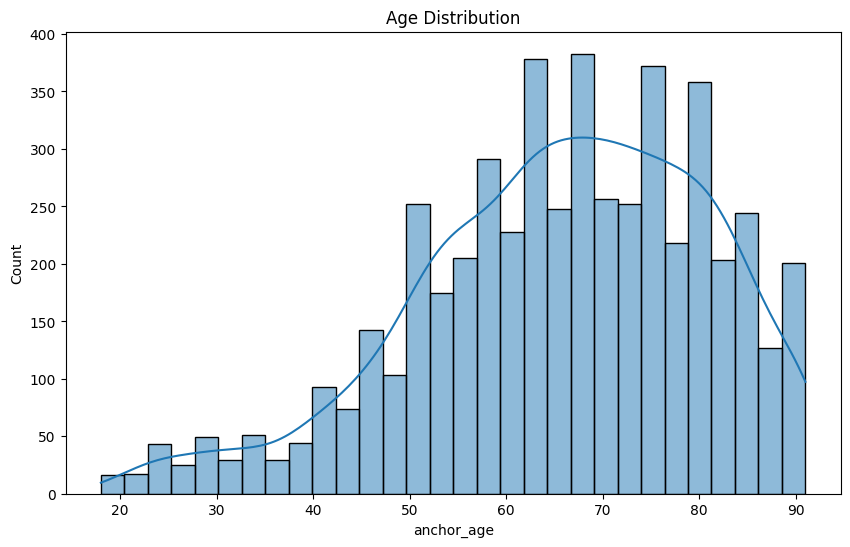

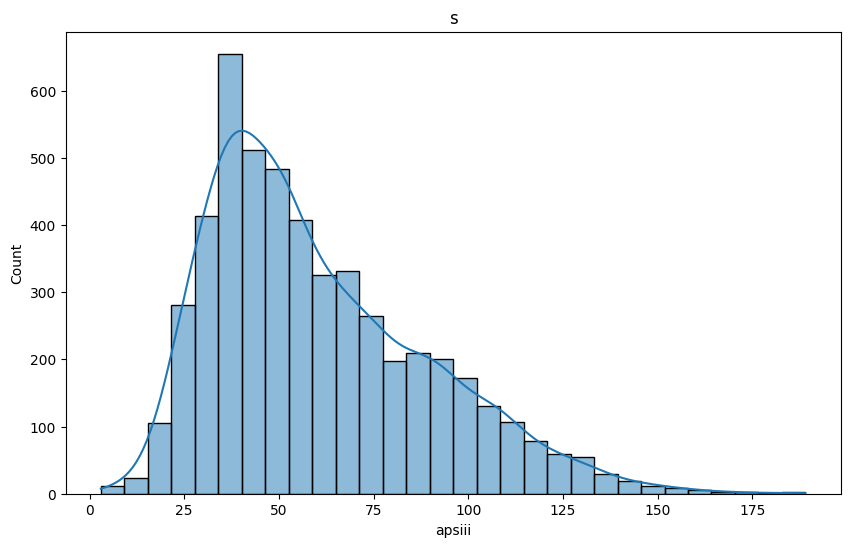

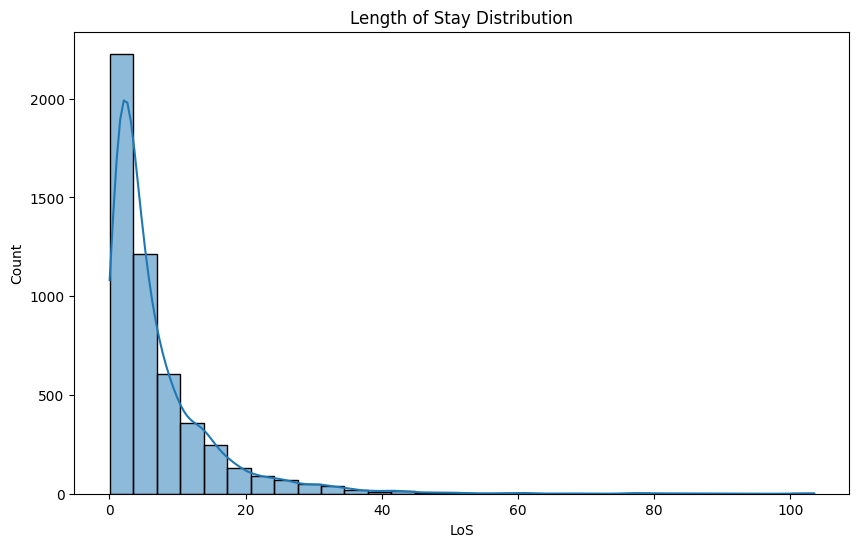

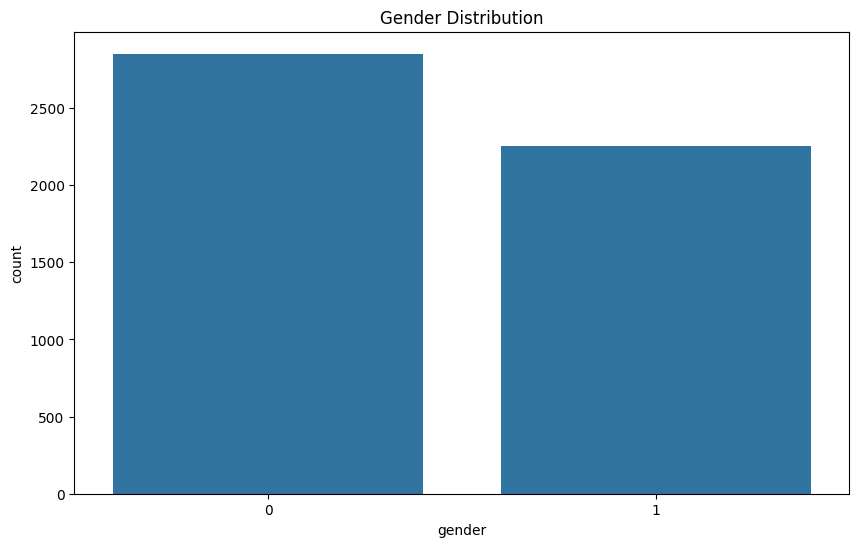

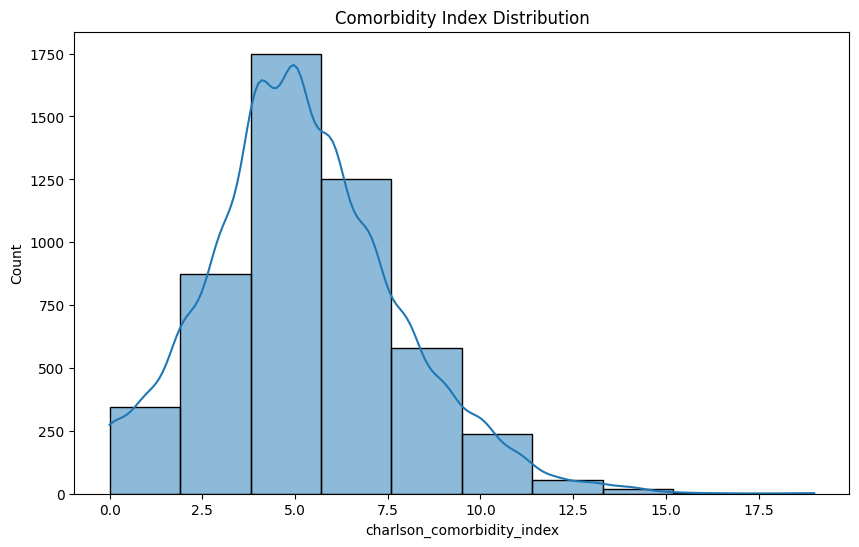

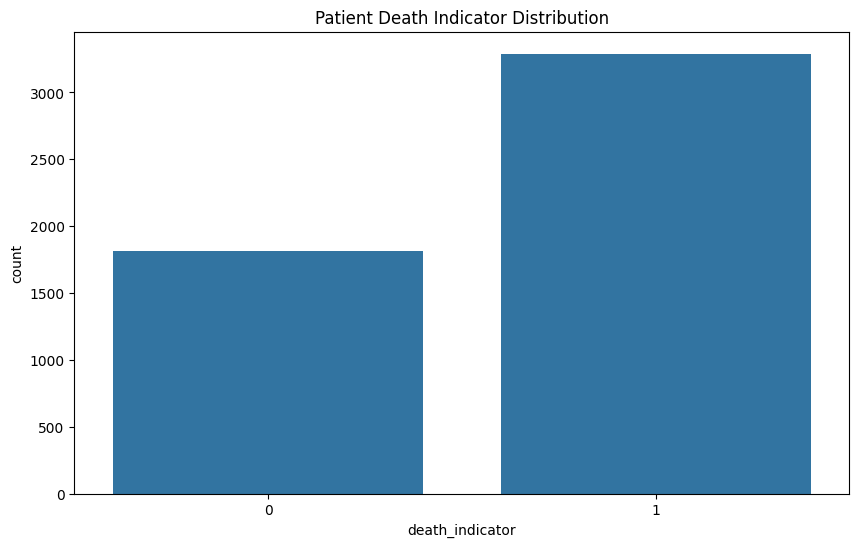

In [22]:
# Anchor Age Summary
plt.figure(figsize=(10,6))
sns.histplot(data['anchor_age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# apsiii Summary
plt.figure(figsize=(10,6))
sns.histplot(data['apsiii'], bins=30, kde=True)
plt.title('s')
plt.show()

# LoS Summary
plt.figure(figsize=(10,6))
sns.histplot(data['LoS'], bins=30, kde=True)
plt.title('Length of Stay Distribution')
plt.show()

# Gender Summary
plt.figure(figsize=(10,6))
sns.countplot(x='gender', data=data)
plt.title('Gender Distribution')
plt.show()

# Comorbidity Index Summary
plt.figure(figsize=(10,6))
sns.histplot(data['charlson_comorbidity_index'], bins=10, kde=True)
plt.title('Comorbidity Index Distribution')
plt.show()

# Patient Death Indication Summary
plt.figure(figsize=(10,6))
sns.countplot(x='death_indicator', data=data)
plt.title('Patient Death Indicator Distribution')
plt.show()



In [23]:
# Summary statistics
summary = data.describe()

print(summary)

# Count the number of null values in each column
null_values = data.isnull().sum()

# Display the number of null values per column
print("Number of null values in each column:\n", null_values)

        anchor_age       gender       apsiii          LoS  \
count  5106.000000  5106.000000  5106.000000  5106.000000   
mean     65.552683     0.441246    60.314532     7.053651   
std      15.235907     0.496585    28.860171     8.432716   
min      18.000000     0.000000     3.000000     0.040000   
25%      56.000000     0.000000    38.000000     1.960000   
50%      67.000000     0.000000    53.000000     4.130000   
75%      77.000000     1.000000    78.000000     8.960000   
max      91.000000     1.000000   189.000000   103.500000   

       charlson_comorbidity_index  death_indicator  
count                  5106.00000       5106.00000  
mean                      5.21700          0.64434  
std                       2.57691          0.47876  
min                       0.00000          0.00000  
25%                       4.00000          0.00000  
50%                       5.00000          1.00000  
75%                       7.00000          1.00000  
max                      1

## Cohort Characteristics Based on Summary Statistics and Histograms

Based on the summary statistics and histograms provided above, we can analyze the following properties of the cohort:

- **Age**: The mean age of the patients is 65, with the 25th and 75th percentiles at 56 and 77, indicating that the majority of patients in this dataset are elderly. However, the histogram shows that a portion of the cohort includes younger patients aged between 20 and 40.

- **APSIII (Acute Physiology Score III)**: The histogram reveals that the severity of illness scores are skewed to the right, with a mean score of 60. The maximum APSIII score is 189, which is significantly higher than the 75th percentile value of 78, suggesting the presence of potential outliers in the data.

- **Length of Stay (LoS)**: The histogram of the length of stay shows strong right skewness, with most patients staying less than 7 days. The 75th percentile being 7 days and a maximum stay of 103 days further indicates the presence of outliers in the dataset.

- **Gender**: The gender distribution is relatively balanced, though there are slightly more male patients than female patients.

- **Charlson Comorbidity Index**: The histogram of the Charlson Comorbidity Index is slightly skewed to the right but is more normally distributed compared to the length of stay. This suggests fewer extreme outliers, as the maximum index value is 19, which is reasonable for this dataset.

- **Death Indicator**: The histogram clearly shows that approximately two-thirds of the patients in this cohort are deceased. This highlights the critical need to analyze the patient cohorts to identify patterns that may help prevent future deaths.


## Standardize the Dataset

When applying k-means clustering to our dataset, it is essential to **standardize the numerical features**. 

Standardization improves the performance of k-means by ensuring that all features are on the same scale, preventing any one feature from disproportionately influencing the clustering process.

We will standardize all **numerical features** except for those that are **binary**.


In [24]:

# Select relevant columns for clustering
features = ['anchor_age', 'apsiii', 'LoS', 'charlson_comorbidity_index']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])
scaled_df = pd.DataFrame(scaled_data, columns=features)

print(scaled_df.head())


   anchor_age    apsiii       LoS  charlson_comorbidity_index
0    0.948334 -0.149512 -0.006363                   -0.472317
1    0.423207 -0.392085  0.695734                    0.303882
2    1.079616 -0.496045  0.720639                   -0.084217
3    1.539102  0.890084 -0.253045                    0.691982
4    0.226285  1.444536  0.522581                    1.080082


# Find the Appropriate K for the Dataset using Elbow Method




## Calculate Squared Sum of Errors from K-Means Cluster

The **Elbow Method** is a heuristic used to determine the optimal number of clusters (K) in k-means clustering. It involves plotting the **Sum of Squared Errors (SSE)** against the number of clusters.

The "elbow" of the curve is the point where SSE decrease slowdown occurs, indicating that adding further clusters provides diminishing returns. This elbow point is considered the optimal number of clusters since it balances between model complexity and lowering SSE.

When the elbow point is not clearly visible, relying on visual aspect of the graph alone can lead to subjective and potentially inaccurate decisions. In such cases, using additional techniques like the **Second Derivative Method** and  **Kneedle algorithm** (implemented in the `kneed` package) can help mathematically identify the elbow. These techniques remove the ambiguity by analyzing the curve through mathmatical approach, ensuring a more reliable choice of the optimal number of clusters.



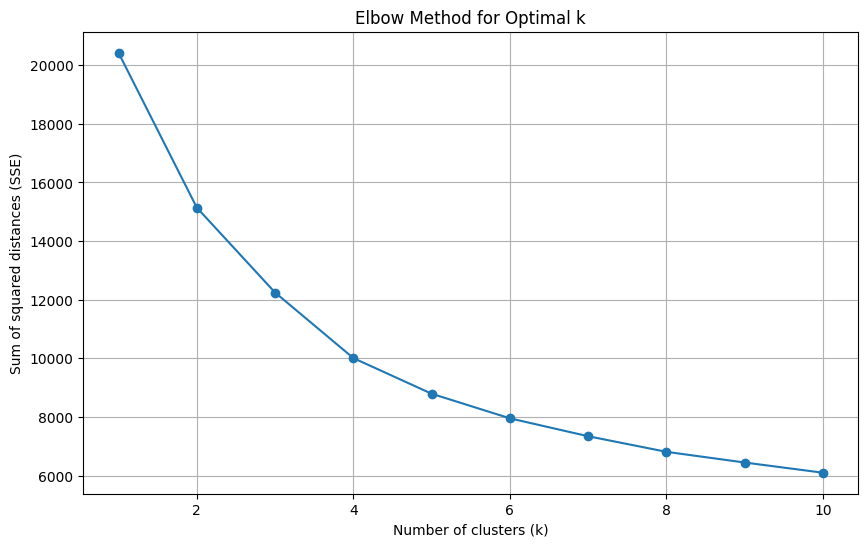

In [25]:
# Compute SSE for k=1 to k=10
K = range(1, 11)
sse = []
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.grid(True)
plt.show()

To determine the optimal value of **K** for k-means clustering using the elbow method, we will perform two tests:

1. **Second Derivative of SSE (Sum of Squared Errors)**:
   - The largest second derivative indicates a sharp drop in SSE, which suggests a possible "elbow point". This point reflects where adding more clusters does not significantly improve the model, thus providing the ideal K.

2. **Kneed Package**:
   - The `kneed` package automatically detects the appropriate K by identifying the elbow in the dataset. After installing the package, you can use it to efficiently determine the optimal number of clusters.

## Method 1: Use Second Derivative of Sum of Squared Error

The optimal number of clusters (k) detected by the Second Derivative Method: 3


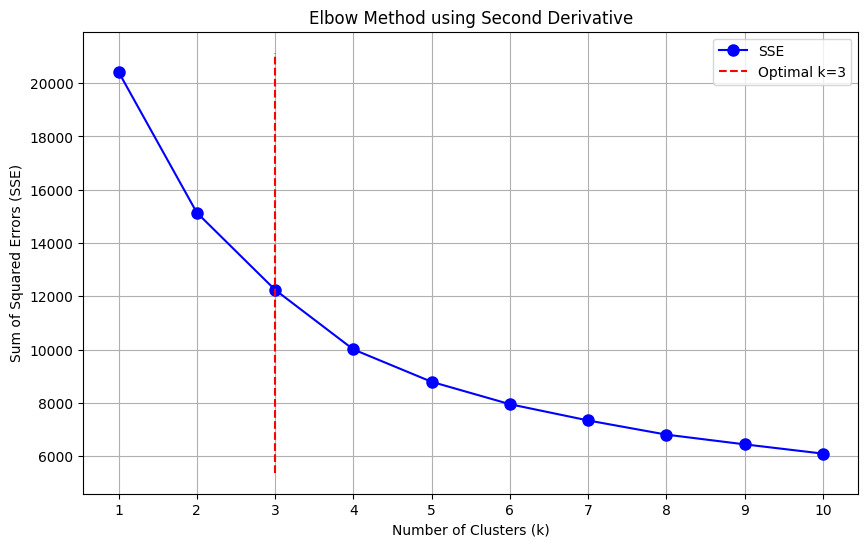

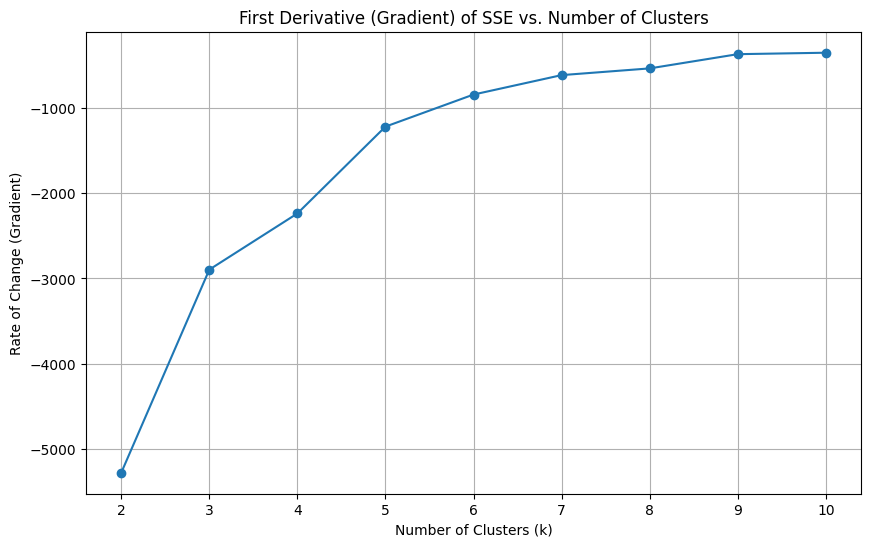

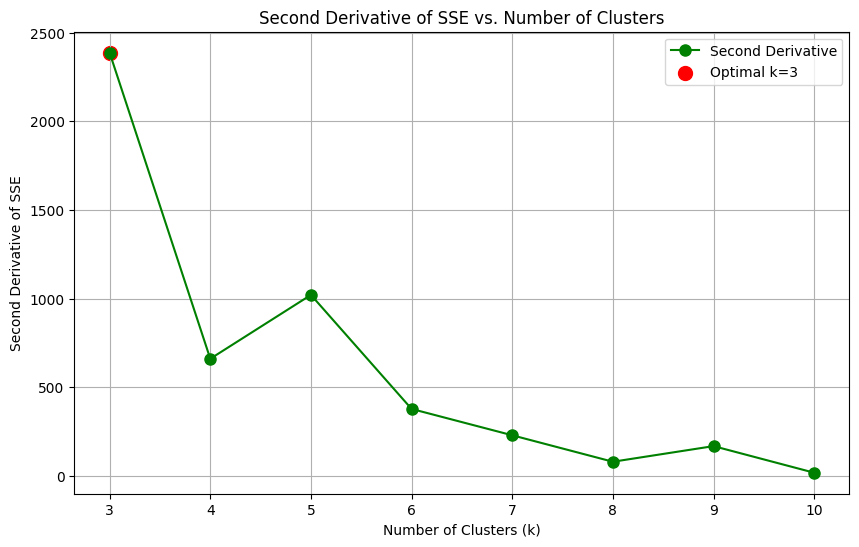

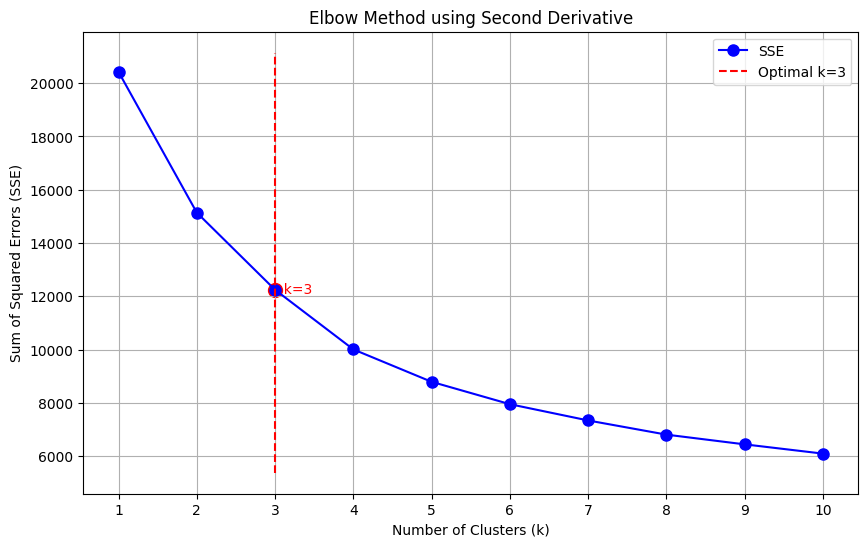

In [26]:
# Compute First and Second Derivatives
gradient = np.diff(sse) 
second_derivative = np.diff(gradient) 

# Corresponding k values for the second derivative
k_second_derivative = K[2:] 

# Identify the Optimal k
optimal_k = k_second_derivative[np.argmax(second_derivative)]
print(f"The optimal number of clusters (k) detected by the Second Derivative Method: {optimal_k}")

# Visualization

# a. Plot SSE vs. k with Elbow
plt.figure(figsize=(10, 6))
plt.plot(K, sse, 'bo-', markersize=8, label='SSE')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red', label=f'Optimal k={optimal_k}')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method using Second Derivative')
plt.xticks(K)
plt.legend()
plt.grid(True)
plt.show()

# b. Plot First Derivative (Gradient)
plt.figure(figsize=(10, 6))
plt.plot(range(2, len(sse) + 1), gradient, marker='o')
plt.title('First Derivative (Gradient) of SSE vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Rate of Change (Gradient)')
plt.grid(True)
plt.show()

# c. Plot Second Derivative (Curvature)
plt.figure(figsize=(10, 6))
plt.plot(k_second_derivative, second_derivative, 'go-', markersize=8, label='Second Derivative')
plt.scatter(optimal_k, second_derivative[np.argmax(second_derivative)], color='red', s=100, label=f'Optimal k={optimal_k}')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Second Derivative of SSE')
plt.title('Second Derivative of SSE vs. Number of Clusters')
plt.xticks(k_second_derivative)
plt.legend()
plt.grid(True)
plt.show()

# d. Optional: Annotate the Optimal k on the SSE Plot
plt.figure(figsize=(10, 6))
plt.plot(K, sse, 'bo-', markersize=8, label='SSE')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red', label=f'Optimal k={optimal_k}')
plt.scatter(optimal_k, sse[optimal_k-1], color='red', s=100)
plt.text(optimal_k, sse[optimal_k-1], f'  k={optimal_k}', color='red', va='center')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method using Second Derivative')
plt.xticks(K)
plt.legend()
plt.grid(True)
plt.show()


## Method 2: Use the Kneed Package to Automaticaly Detect Elbow

The optimal number of clusters (k) detected by Kneedle: 4


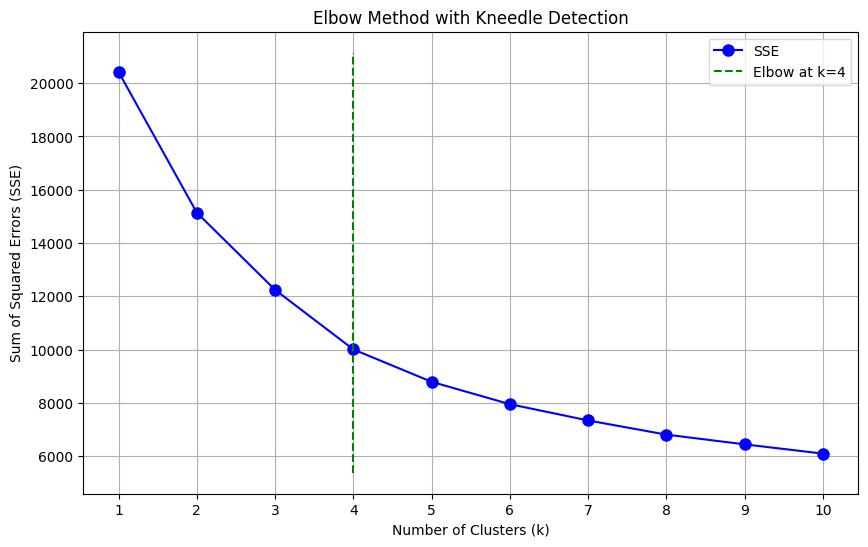

In [27]:
# Initialize KneeLocator
kneedle = KneeLocator(K, sse, curve='convex', direction='decreasing')

# Optimal k
optimal_k_kneedle = kneedle.knee
print(f"The optimal number of clusters (k) detected by Kneedle: {optimal_k_kneedle}")

# Plot with Kneedle detection
plt.figure(figsize=(10, 6))
plt.plot(K, sse, 'bo-', markersize=8, label='SSE')
plt.vlines(optimal_k_kneedle, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='green', label=f'Elbow at k={optimal_k_kneedle}')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method with Kneedle Detection')
plt.xticks(K)
plt.legend()
plt.grid(True)
plt.show()

## Choose Number of Clusters for the Model

I used two methods to determine the optimal number of clusters: the second derivative of the Sum of Squared Errors (SSE) and the `kneed` package. While the second derivative method suggested **K=3**, the `kneed` package identified **K=4** as the optimal number. I chose to proceed with **K=4**, based on the design and advantages of the Kneedle algorithm, which underpins the `kneed` package.

### Second Derivative Method
The second derivative method calculates the point where the rate of SSE decrease is highest, suggesting **K=3**. However, this method has limitations:
- **Visual ambiguity**: It relies on interpreting the SSE curve, which can be challenging when the elbow isn't clearly visible. In this dataset, the elbow is hard to pinpoint.
- **Noise sensitivity**: The second derivative method is sensitive to small fluctuations in the curve, making it less reliable when the elbow is subtle.
-  **Losing Cluster Points**: When we calculate the second derivative of the SSE, due to the non linearity, continously taking derivative to SSE will eventually lose data points as shown in the graph (3~10 clusters)

### Kneed Package (Kneedle Algorithm)
The `kneed` package, based on the **Kneedle algorithm** described in [Satopää et al. (2011)](https://raghavan.usc.edu/papers/kneedle-simplex11.pdf), offers a more robust approach:
- **Mathematical rigor**: The Kneedle algorithm accounts for both curve steepness and trend changes, ensuring more accurate elbow detection, particularly when the elbow is subtle.
- **Noise resilience**: The algorithm smooths out minor fluctuations, making it less susceptible to noise compared to the second derivative method.

### Justification for Choosing K=4
Given these factors, I chose **K=4** as identified by the `kneed` package. The Kneedle algorithm's ability to detect the elbow in noisy or ambiguous curves makes it more reliable than the second derivative method. Its algorithm ensures that **K=4** better captures the underlying structure of the dataset, leading to more meaningful patient subgroups.


## Plot KMean Model with 4 Clusters

In [28]:
# KMean Model with 4 Cluster
kmeans_4 = KMeans(n_clusters=4, random_state=0)
data['cluster_4'] = kmeans_4.fit_predict(scaled_df)


## Visualize the Plot of K=4 Model

### Box Plot Visualisation for each Cluster Group

/var/folders/v8/5m92pwd52hj2jgl3z_g3wjlc0000gn/T/ipykernel_17396/4226400195.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_4', y=column, data=data, palette=palette)
/var/folders/v8/5m92pwd52hj2jgl3z_g3wjlc0000gn/T/ipykernel_17396/4226400195.py:4: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.boxplot(x='cluster_4', y=column, data=data, palette=palette)


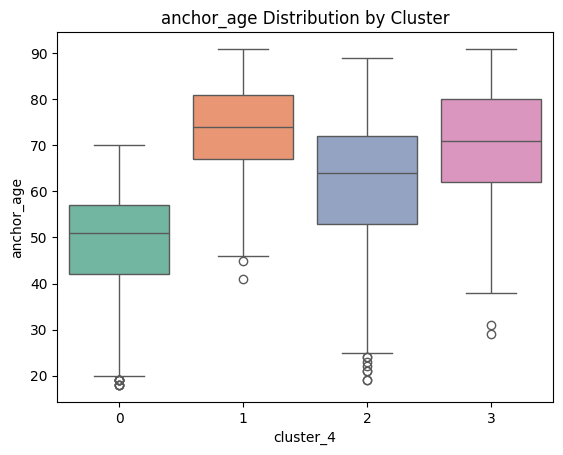

/var/folders/v8/5m92pwd52hj2jgl3z_g3wjlc0000gn/T/ipykernel_17396/4226400195.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_4', y=column, data=data, palette=palette)
/var/folders/v8/5m92pwd52hj2jgl3z_g3wjlc0000gn/T/ipykernel_17396/4226400195.py:4: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.boxplot(x='cluster_4', y=column, data=data, palette=palette)


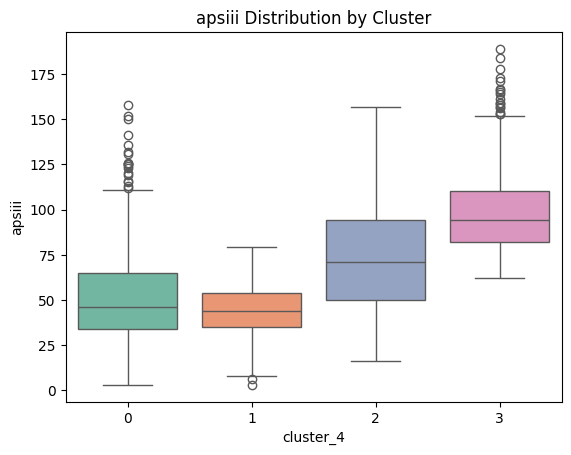

/var/folders/v8/5m92pwd52hj2jgl3z_g3wjlc0000gn/T/ipykernel_17396/4226400195.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_4', y=column, data=data, palette=palette)
/var/folders/v8/5m92pwd52hj2jgl3z_g3wjlc0000gn/T/ipykernel_17396/4226400195.py:4: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.boxplot(x='cluster_4', y=column, data=data, palette=palette)


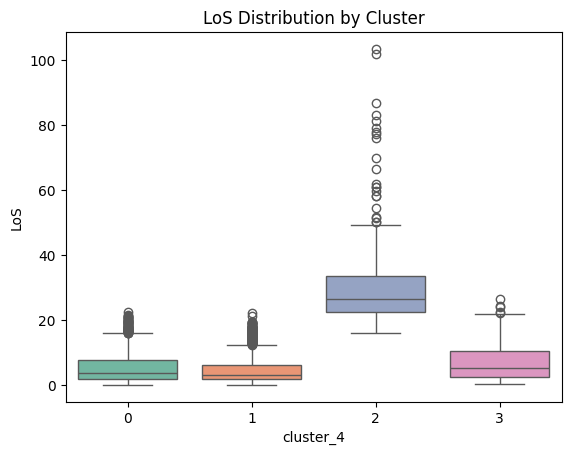

/var/folders/v8/5m92pwd52hj2jgl3z_g3wjlc0000gn/T/ipykernel_17396/4226400195.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_4', y=column, data=data, palette=palette)
/var/folders/v8/5m92pwd52hj2jgl3z_g3wjlc0000gn/T/ipykernel_17396/4226400195.py:4: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.boxplot(x='cluster_4', y=column, data=data, palette=palette)


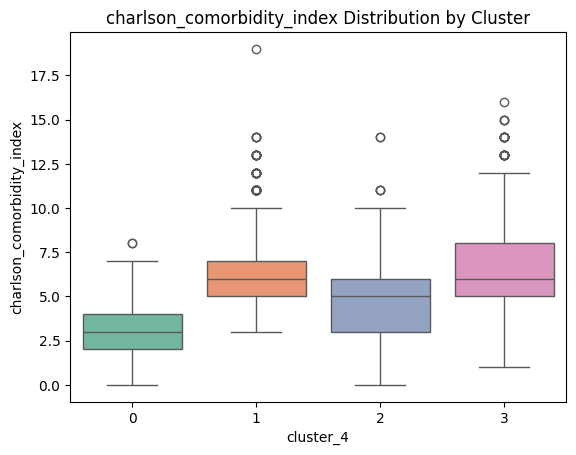

In [29]:
palette = sns.color_palette("Set2")

for column in list(scaled_df.columns):
    sns.boxplot(x='cluster_4', y=column, data=data, palette=palette)
    plt.title(f'{column} Distribution by Cluster')
    plt.show()


### Bar Plot of Mortaity Rate for Each Cluster Group

/var/folders/v8/5m92pwd52hj2jgl3z_g3wjlc0000gn/T/ipykernel_17396/1303234506.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f'Cluster ({k})', y='Mortality Rate', data=mortality_rates, palette='Set2')


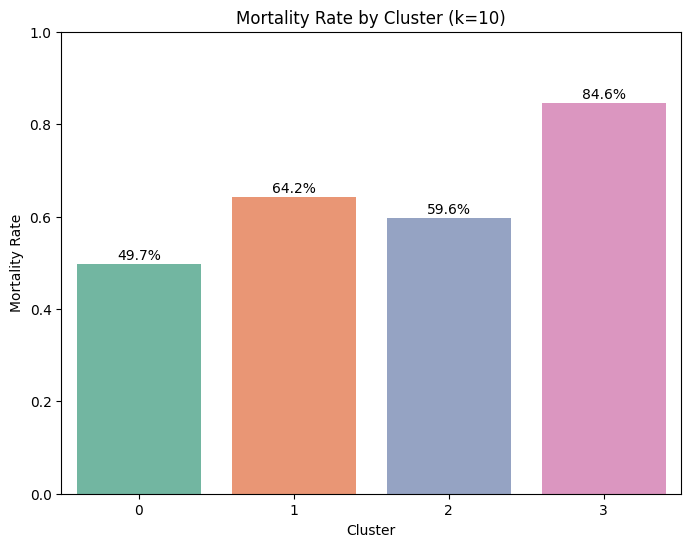

In [30]:
plt.figure(figsize=(8, 6))

# Calculate mortality rates per cluster
mortality_rates = data.groupby('cluster_4')['death_indicator'].mean().reset_index()

# Rename columns for better readability
mortality_rates.columns = [f'Cluster ({k})', 'Mortality Rate']

# Create a bar plot
sns.barplot(x=f'Cluster ({k})', y='Mortality Rate', data=mortality_rates, palette='Set2')

# Add percentage labels on top of the bars
for index, row in mortality_rates.iterrows():
    plt.text(index, row['Mortality Rate'] + 0.01, f"{row['Mortality Rate']*100:.1f}%",
              color='black', ha="center")

# Set plot titles and labels
plt.title(f'Mortality Rate by Cluster (k={k})')
plt.ylabel('Mortality Rate')
plt.ylim(0, 1) 
plt.xlabel('Cluster')

# Display the plot
plt.show()

## Cluster Comparison: Properties and Patient Outcomes

According to the bar plot of mortality rates, **cluster 3** exhibits the highest mortality rate, followed by **cluster 1** and **cluster 2**, with **cluster 0** showing the lowest mortality rate. Let’s compare these mortality rates with the distribution of key features across the clusters using box plots.

### Age:
The box plot reveals that **cluster 0** has the youngest average age, while the other clusters—particularly **cluster 3**—have higher average ages. This suggests that lower age may correlate with lower mortality rates in hypotension patients, as seen in **cluster 0**.

### APSIII (Acute Physiology Score III):
Patients in **cluster 3** have the highest APSIII scores, indicating greater illness severity, which corresponds with the highest mortality rate. However, **cluster 1**—which has a relatively low APSIII, similar to **cluster 0**—also shows a higher mortality rate. This implies that APSIII alone may not be a definitive predictor of mortality, and other factors likely contribute to the outcome.

### Length of Stay (LoS):
The length of stay doesn't show a clear relationship with mortality. **Cluster 2** tends to have a longer stay compared to the other groups, but this doesn't correspond to a higher mortality rate. Therefore, LoS does not appear to be strongly linked to mortality in this case.

### Charlson Comorbidity Index:
This feature seems to be the most significant predictor of mortality. **Cluster 0** has the lowest Charlson Comorbidity Index, while **cluster 3** shows the highest values, particularly in the 75th percentile. The mean Charlson Index in **clusters 3** and **1** is almost identical, whereas **clusters 2** and **0** have significantly lower scores. This suggests a strong positive relationship between comorbidity and mortality.

### Conclusion:
Based on the analysis, patients in **cluster 3** require the most attention from healthcare providers, as they are likely at the greatest risk of mortality. While age and Charlson Comorbidity Index appear to be key factors, APSIII and LoS show more nuanced relationships with patient outcomes.

